<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [3]:
boston_df.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


## Task 2: Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

    For the "Median value of owner-occupied homes" provide a boxplot

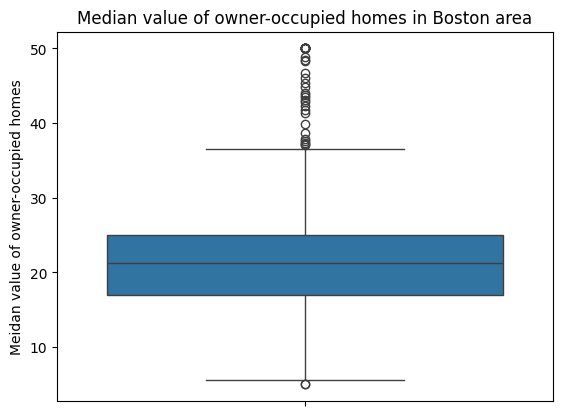

In [7]:
ax = sns.boxplot(y='MEDV', data=boston_df)
pyplot.ylabel('Meidan value of owner-occupied homes')
pyplot.title('Median value of owner-occupied homes in Boston area')
pyplot.show()

    Provide a  bar plot for the Charles river variable

From the box plot above, the mdian value of owner occupited homes in Boston area is around 20, and there are many outliers with more price.  

Text(0.5, 1.0, 'The Charles river bound yes vs no ')

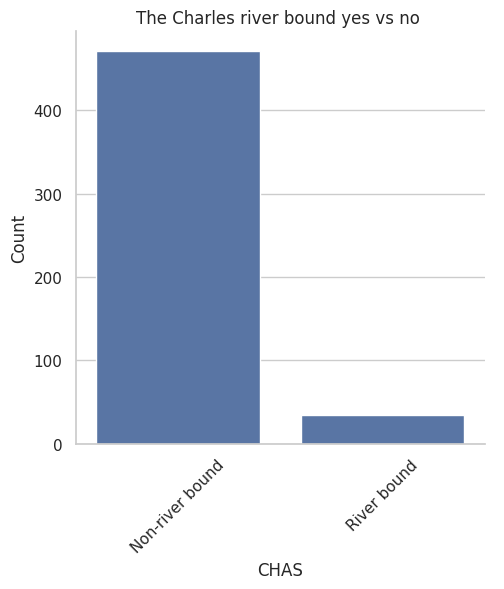

In [22]:
sns.set(style="whitegrid")
ax = sns.catplot(x="CHAS", kind= 'count', data=boston_df)

ax.set_xticklabels(["Non-river bound", "River bound"], rotation=45)

# Set y-axis label
ax.set_ylabels("Count")

pyplot.title("The Charles river bound yes vs no ")

From the bar plot above, most of the homes are not Charles river bound. 

    Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Text(0.5, 1.0, 'Median value of owner-occupied homes according to age groups')

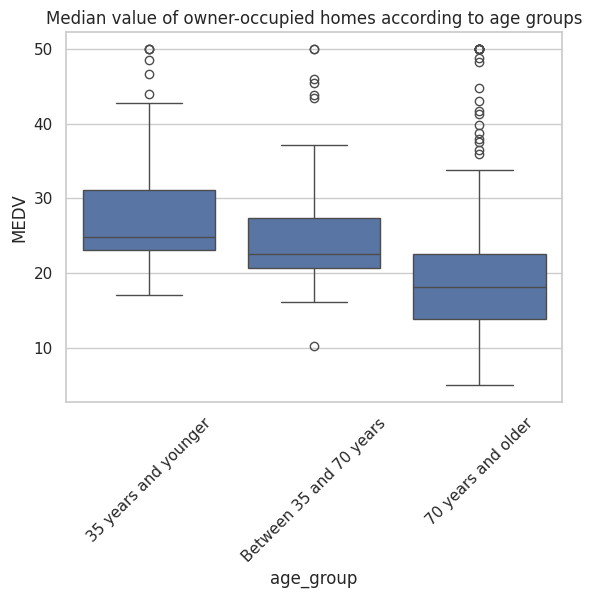

In [27]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'Between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
age_order = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df, order = age_order)
pyplot.xticks(rotation=45)
pyplot.title("Median value of owner-occupied homes according to age groups")

From the box plot above, the median value of owner-occupied homes degrease as ower's age incease

    Provide a scatter plot to show the relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS). What can you say about the relationship?

Text(0.5, 1.0, 'Relationship between Nitric oxide concentrations (NOX)\nand the proportion of non-retail business acres per town(INDUS)')

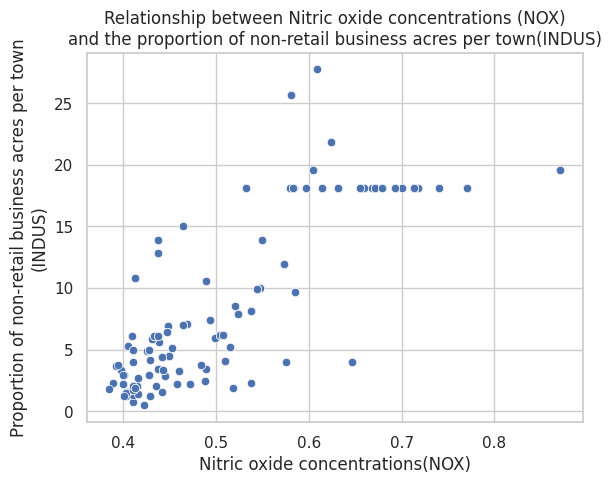

In [32]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.xlabel('Nitric oxide concentrations(NOX)')
pyplot.ylabel('Proportion of non-retail business acres per town\n(INDUS)')
pyplot.title('Relationship between Nitric oxide concentrations (NOX)\nand the proportion of non-retail business acres per town(INDUS)')

From the scatter plot above, there is a positive correlation between NOX and INDUS. 

    Create a histogram for the pupil to teacher ratio variable

In [34]:
boston_df['PTRATIO'].unique()

array([15.3, 17.8, 18.7, 15.2, 21. , 19.2, 18.3, 17.9, 16.8, 21.1, 17.3,
       15.1, 19.7, 18.6, 16.1, 18.9, 19. , 18.5, 18.2, 18. , 20.9, 19.1,
       21.2, 14.7, 16.6, 15.6, 14.4, 12.6, 17. , 16.4, 17.4, 15.9, 13. ,
       17.6, 14.9, 13.6, 16. , 14.8, 18.4, 19.6, 16.9, 20.2, 15.5, 18.8,
       22. , 20.1])

Text(0.5, 1.0, 'Distribution of pupil to teacher ration')

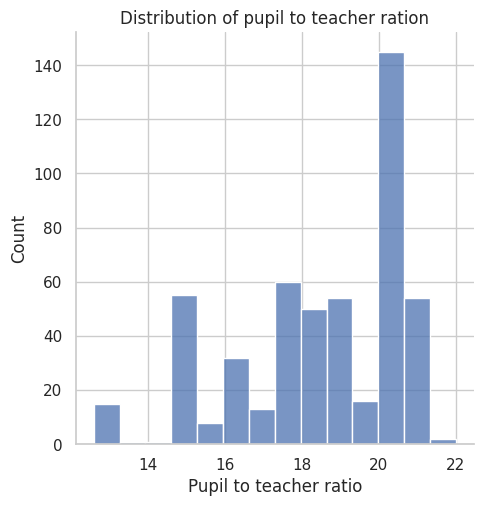

In [36]:
ax = sns.displot(boston_df['PTRATIO'], kde = False)
pyplot.xlabel('Pupil to teacher ratio')
pyplot.title('Distribution of pupil to teacher ration')

There are huge difference in pupil to teacher ratio in different Boston area.

## Task 3: Use the appropriate tests to answer the questions provided.

For each of the following questions;

    Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

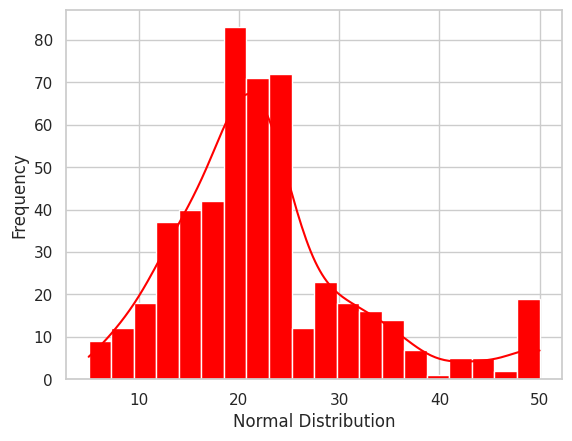

In [50]:
ax = sns.histplot(boston_df['MEDV'],
                  bins=20,
                  kde=True,
                  color='red',
                  linewidth= 1, alpha=1)
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

In [51]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [38]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

H0: There is no significant difference in median value of houses bounded by the Charles river, or not bounded by the Charles river  
Ha: there is significant difference in median value of houses between houses bounded by the Charles river and houses that don't.  
The distribution of MEDV fit normal distribution,
However, accoroding to Levene's Test, the p-value is less than 0.05, the equality of variance cannot be garenteed.   
Here the p-value is smaller than 0.05, thus we reject the null hypothesis. 

    Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'Between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

In [41]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'Between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


H0: There is no significance difference in median values of houses for each proportion of owner occupied units built prior to 1940.
Ha:  At least one of the means differ
Here the p value is less than 0.05, thus there is significant difference for at least one of the means


    Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [53]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241263e-98)

In [52]:
## X is the input variables (or independent variables)
X = boston_df['NOX']
## y is the target/dependent variable
y = boston_df['INDUS']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics, here sklearn.LinearRegression cannot provide statistical summary. 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  INDUS   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Thu, 29 May 2025   Prob (F-statistic):           7.91e-98
Time:                        19:26:06   Log-Likelihood:                -1470.5
No. Observations:                 506   AIC:                             2945.
Df Residuals:                     504   BIC:                             2954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9414      0.965    -14.450      0.000     -15.837     -12.046
NOX           45.2108      1.703     26.554      0.000      41.866      48.556
==============================================================================
Omnibus:                       46.050   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.622
Skew:                           0.649   Prob(JB):                     2.07e-15
Kurtosis:                       4.233   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

H0: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
Ha: There is association between Nitric oxide concentrations and proportion of non-retail business acres per town
Since p is less than 0.05, there is association between the two values. 

    What is the impact of an additional weighted distance (DIS) to the five Boston employment centres on the median value of owner occupied homes (MEDV)? (Regression analysis)

In [54]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,Between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,Between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,Between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,Between 35 and 70 years


In [55]:
## X is the input variables (or independent variables)
X_ = boston_df['DIS']
## y is the target/dependent variable
y_ = boston_df['MEDV']
## add an intercept (beta_0) to our model
X_ = sm.add_constant(X_) 

model = sm.OLS(y_, X_).fit()
predictions = model.predict(X_)

# Print out the statistics, here sklearn.LinearRegression cannot provide statistical summary. 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 29 May 2025   Prob (F-statistic):           1.21e-08
Time:                        19:30:52   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here, the p value is less than 0.05, thus there is correlation between 'DIS' and 'MEDV'. From the coef we can conclude that for each 'DIS', the 'MEDV' would increase 1.0916.

Be sure to:

    State your hypothesis.

    Use α = 0.05

    Perform the test Statistics.

    State the conclusion from the test.